**Mini Capstone Project**
 
This Project is about Data interpretation and visualisation of a fictional telco company that provided home phone and Internet services to 7043 customers in California in Quarter 3 of the fiscal year.

**Data Description**

7043 observations with 33 variables



* CustomerID: A unique ID that identifies each customer.

* Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.


*   Country: The country of the customer’s primary residence.

*   State: The state of the customer’s primary residence.


* City: The city of the customer’s primary residence.
* Zip Code: The zip code of the customer’s primary residence.
* Lat Long: The combined latitude and longitude of the customer’s primary residence.
* Latitude: The latitude of the customer’s primary residence.
* Longitude: The longitude of the customer’s primary residence.
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicate if the customer has a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programming from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
* Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
* Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
*  CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
* Churn Reason: A customer’s specific reason for leaving the 
company. Directly related to Churn Category.









In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import seaborn as sns

**Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.**



In [22]:
df=pd.read_excel("Telco_customer_churn.xlsx")
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [29]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Generally Data types are divided into Qualitative data and Quantitative data.

**Qualitative Data** :-It is categorical data type and if further classified Nominal and Ordinal data.

**Quantitative Data** :- It is Numerical data type and is further classified as Discrete and continuous data.

Let's understand from the given data set.

* Columns like Country, Gender, Tenure months, contract etc. contains categorical data and can be called as Quantitative data type.

* Columns like Customer ID, Count, Zip code, Latitude, Longitude etc. contains numerical value and can be called as Qualitative data type.

Python consists of 4 Data types namely,
* Int - Integer values
* Float - Decimal values
* Str - String type(collection of on or more characters)
* Char - Character type
* Boolean - True or False

The above data consists columns with integer, string , character, boolean values like Gender, contract are read as object type data.
only float columns like Count, Zip code, Latitude, Longiotude etc. are read as Float type data.



**Q2.Please apply appropriate statistical measures using python based on data types.**

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## From the above output, we can measure Count, mean, std, min, 25%, 50%, 50%, 75%, max values of the columns which are having Float data type.

Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.



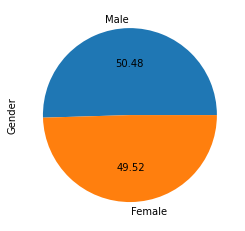

In [ ]:
df.loc[:,('Gender','Senior Citizen')]
df1=df['Gender'].value_counts('Female')*100
df1.plot(kind='pie', autopct='%.2f')


From the above pie chart we can see the percentage of females in Gender column.

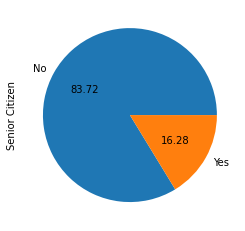

In [ ]:
df.loc[:,('Gender','Senior Citizen')]
data_female=df[df['Gender']=='Female']
female_senior=data_female['Senior Citizen'].value_counts('Yes')
female_senior.plot(kind='pie', autopct='%.2f')

From the above pie chart we can see the percentage of female senior citizens.

**Q4.Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.**


Mean= Tenure Months    32.371149
dtype: float64
Median= Tenure Months    29.0
dtype: float64
Mode=    Tenure Months
0            1.0
std= Tenure Months    24.559481
dtype: float64
Variance= Tenure Months    603.168108
dtype: float64
skewness value Tenure Months    0.23954
dtype: float64


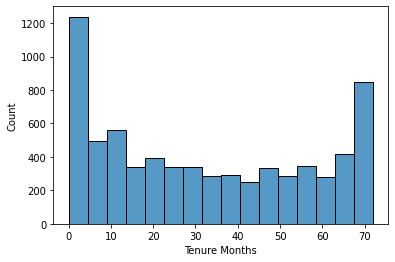

In [ ]:
df=pd.read_excel('Telco_customer_churn.xlsx', usecols=['Tenure Months'])

#Histogram is appropriate plot used for distribution of numerical values.
sns.histplot(x='Tenure Months',data=df)

#Below are the function used to perform statistical measures based on the above distribution. 
print('Mean=',df.mean())
print('Median=',df.median())
print('Mode=',df.mode())
print('std=',df.std())
print('Variance=',df.var())
print('skewness value',df.skew())

From the Histogram, it is understood that customers are with tenure of 0-10 months are more and ciunt has been gradually decreased for the tenure of 10-60 months and slightly inceased for the tenure of 60-70 months period. 

Skew() is used to calculate the skewness of the numerical variable which measures the symmetry or lack of it. The skewness value can be positive , negative or undefined. The perfect symmetrical distribution will have same mean,median,mode values.

The skewness value can be interpreted as 
* Highly skewed - skewness value is <-1 or >+1.
* Moderately skewed - skewness value is between -1 & -0.5 or +0.5 and +1.
* Symmetrical - skewness value lies between -0.5 & +0.5.

Hence, the given numerical variable of column 'Tenure Months' is symmetrical.

**Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.**



In [ ]:
#Binary columns available in the given dataframe are 'Gender' & 'Columns'
data_binary=pd.read_excel('Telco_customer_churn.xlsx', usecols = ['Gender','Senior Citizen'])

#Replace Gender column as 'Female=0' and 'Male=1' and give inplace as true to affect the given statement in the Dataframe   
data_binary['Gender'].replace(['Female','Male'],[0,1], inplace=True)

#Replace Senior Citizen column as 'Yes=1' and 'No=0' and give inplace as true to affect the given statement in the Dataframe  
data_binary['Senior Citizen'].replace(['Yes','No'],[1,0], inplace=True)
data_binary

,Gender,Senior Citizen
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
7038,0,0
7039,1,0
7040,0,0
7041,0,0


The above output shows the converted values of binary columns 'Gender' & 'Senior Citizen' to 0 & 1 respectively.

**Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also.** 



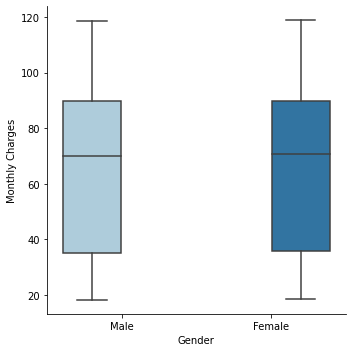

In [ ]:
data_plot=pd.read_excel('Telco_customer_churn.xlsx', usecols = ['Gender','Monthly Charges'])
sns.catplot(x='Gender',y='Monthly Charges',hue='Gender',kind='box', data=data_plot, palette='Paired')

It is observed that IQR- Interquartile range in both Male and Female is approximately equal. 
This means that both Male and Female are equally using all the services provided by the company and hence,the current monthly charges are equally applied in both categories.

**Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.**



In [89]:
#Filter the City by Los Angeles and create a new data frame of Los Angeles
df_LA=df[df['City']=='Los Angeles']

#dtype of "Total Charges" is string 'object'. Hence, Convert to dtype:'Float'
df['Total_Charges1']=pd.to_numeric(df_LA['Total Charges'], errors='coerce')# errors statement will the null values with 'na' if any

#Min of 'Total Charges' from new data frame
df_LA['Total_Charges1'].min()
print('Min Total Charges for Los Angeles is :',df_LA['Total_Charges1'].min())

#Zip Code of Max Total Charges
df_zip=df_LA[df_LA['Total_Charges1']==df_LA['Total_Charges1'].max()]
print('Zip Code with Max Total Charges is:',df_zip['Zip Code'])


Min Total Charges for Los Angeles is : 18.8
Zip Code with Max Total Charges is: 3117    90044
Name: Zip Code, dtype: int64


We have got good insights in converting the data types of the columns.The result is as follows,

The minimum Total charges in Los Angeles city is: **18.8**

The Zip Code with Maximum Total Charges is: **90044**

**Q8: Please find which payment method has the highest churn score and which has the lowest churn score.**



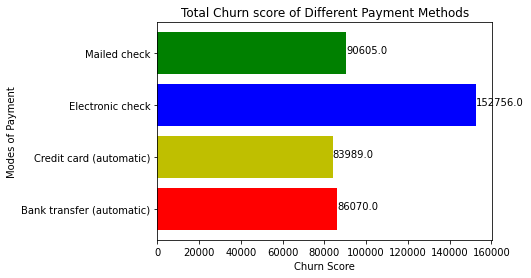

In [ ]:
#To find the highest and lowest churn score in payment method we need to group "payment Method" & "churn score"columns
df_churnscore=df.groupby('Payment Method')['Churn Score'].sum()
x=(df_churnscore.index)
y=(df_churnscore.values)
plt.xlabel('Churn Score')
plt.ylabel('Modes of Payment')
plt.title('Total Churn score of Different Payment Methods')
plt.barh(x,y, color=['R','Y','B','G'])#plt.barh is used to calculate the height of the bar in bar plot
for ind,value in enumerate(y):
  plt.text(value,ind, str(value))

The above bar graph represents the Churn score of different Payment methods made by customers.
It is understood that,
* **Electronic Check** has the **Highest Churn score** of **152756**
* **Credit Card(automatic)** has the **Lowest Churn Score** of **83989**


**Q9: Please create an appropriate plot to check the count of payment methods and explain it.**



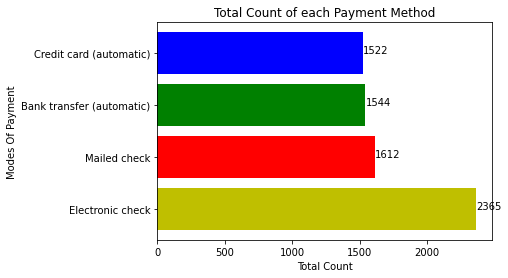

In [ ]:
df_count=df['Payment Method'].value_counts()#Count of each payment method by using 'Value_counts' function
x=(df_count.index)
y=(df_count.values)
plt.xlabel('Total Count')
plt.ylabel('Modes Of Payment')
plt.title('Total Count of each Payment Method')
plt.barh(x,y, color=['Y','R','G','B'])
for ind,value in enumerate(y):
  plt.text(value,ind, str(value))

The above bar graph show the total count of each payment method made by customers.The count is as follows
* **Electronic check-             2365**
* **Mailed check  -               1612**
* **Bank transfer (automatic)-    1544**
* **Credit card (automatic)  -    1522**


Therefore, maximum no. of the customers are making payments through Electronic check.


**Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.**



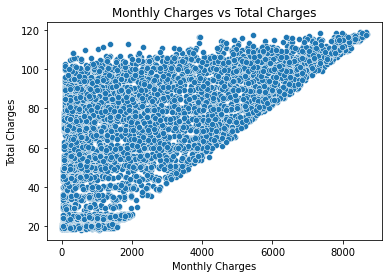

In [113]:
df['Total Charges']=pd.to_numeric(df['Total Charges'], errors='coerce')
data=df.groupby('Monthly Charges')['Total Charges'].sum()
x=(data.index)
y=(data.values)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges')
sns.scatterplot(x='Total Charges',y='Monthly Charges',data=df)


The scatter plot is used to see the relation between numerical variables.

The above scatter plot shows the relationship between Monthly charges and Total charges for end of Quarter 3.
Here, monthly charges are directly proportional to Total charges. It means as the monthly charges increase the Total charges are also increased.